In [ ]:
pip install ydata-profiling

In [ ]:
pip install pandas-profiling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from skimpy import skim
from ydata_profiling import ProfileReport

In [4]:
tip=sns.load_dataset('tips')

In [5]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tip.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
tip.duplicated().sum()

1

In [10]:
tip.drop_duplicates(inplace=True)

In [11]:
tip.shape

(243, 7)

array([[<AxesSubplot: title={'center': 'total_bill'}>,
        <AxesSubplot: title={'center': 'tip'}>],
       [<AxesSubplot: title={'center': 'size'}>, <AxesSubplot: >]],
      dtype=object)

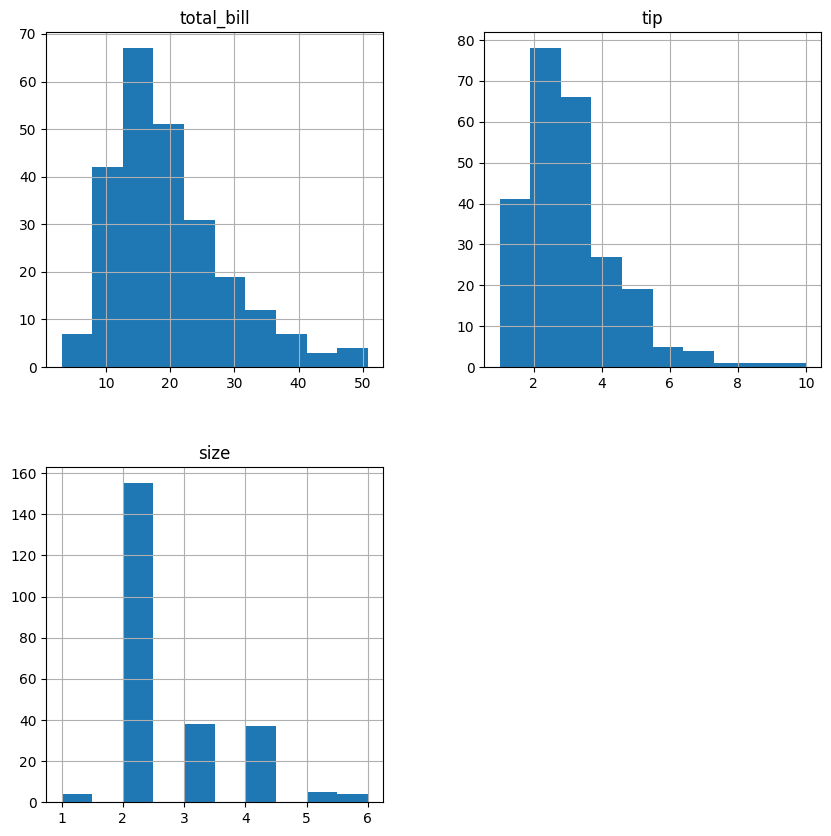

In [12]:
tip.hist(figsize=(10,10))

<AxesSubplot: xlabel='total_bill'>

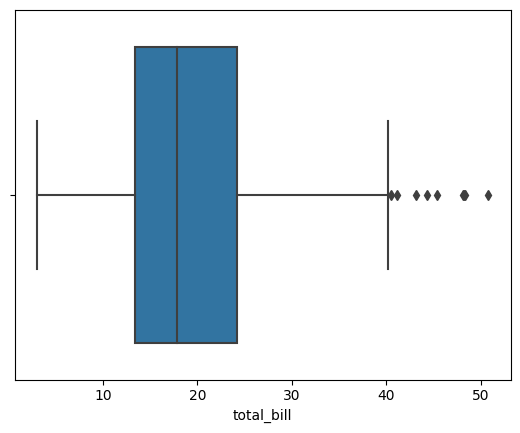

In [13]:
sns.boxplot(x=tip['total_bill'])

In [14]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot: xlabel='day', ylabel='tip'>

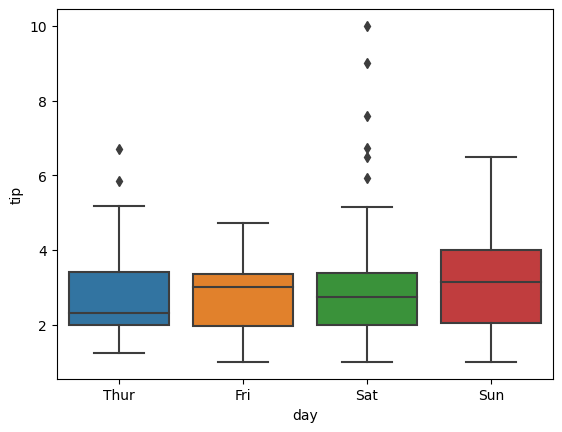

In [15]:
sns.boxplot(y=tip['tip'], x=tip['day'] )

In [17]:
tip.corr()

C:\Users\adeel\AppData\Local\Temp\ipykernel_7004\4261774816.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tip.corr()


,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


C:\Users\adeel\AppData\Local\Temp\ipykernel_7004\3951447155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tip.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

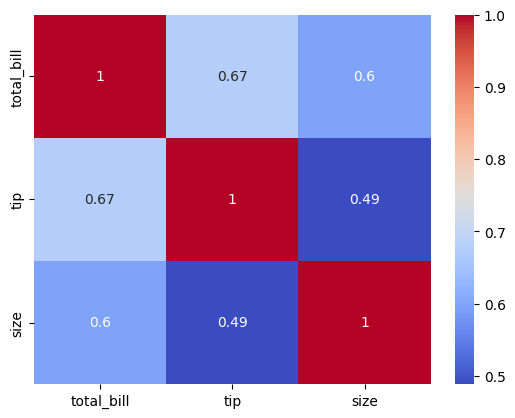

In [19]:
sns.heatmap(tip.corr(), annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

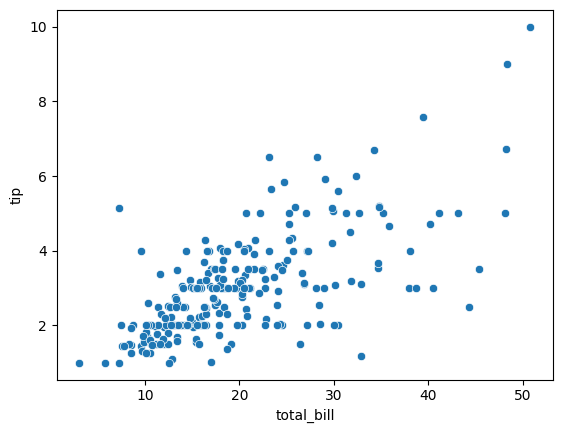

In [22]:
sns.scatterplot(data=tip, x='total_bill', y='tip')

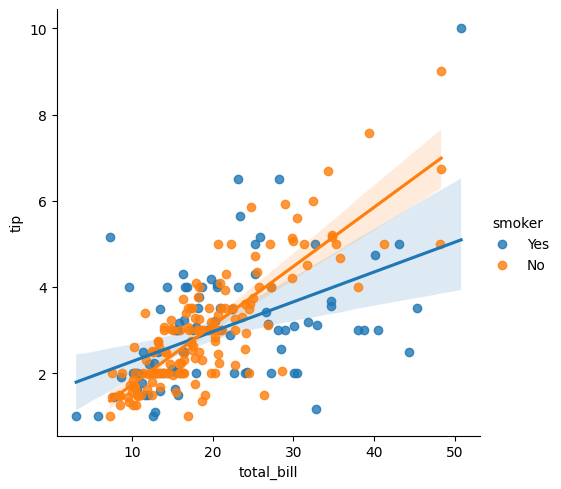

In [24]:
sns.lmplot(data=tip, x='total_bill', y='tip', hue='smoker')

In [25]:
import plotly.express as px

In [27]:
# Make graph on plotly
fig = px.scatter(tip, x='total_bill', y='tip', color='smoker', trendline='ols')
# add a title
fig.update_layout(title_text='Scatter plot of total_bill and tip')
fig.show()

In [28]:
from ydata_profiling import ProfileReport

In [31]:
profile=ProfileReport(tip)


In [33]:
# Save it to html file
profile.to_file(output_file='tips.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Or use skimpy

In [34]:
from skimpy import skim

In [35]:
skim(tip)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 243    │ │ category    │ 4     │ │ sex                   │                                │
│ │ Number of columns │ 7      │ │ float64     │ 2     │ │ smoker                │                                │
│ └───────────────────┴────────┘ │ int32       │ 1     │ │ day                   │                                │
│                                └─────────────┴───────┘ │ time                  │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ total_bill          │     0 │        0 │      20 │     8.9 │    3.1 │     13 │     24 │      51 │  ▂█▄▂▁▁  │  │
│ │ tip                 │     0 │        0 │       3 │     1.4 │      1 │      2 │    3.6 │      10 │   ██▃▁   │  │
│ │ size                │     0 │        0 │     2.6 │    0.95 │      1 │      2 │      3 │       6 │    █▂▂   │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sex                              │         0 │              0 │ False                 │                  2 │  │
│ │ smoker                           │         0 │              0 │ False                 │                  2 │  │
│ │ day                              │         0 │              0 │ False                 │                  4 │  │
│ │ time                             │         0 │              0 │ False                 │                  2 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [36]:
pip install dtale


     ---------------------------------------- 14.0/14.0 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 65.9/65.9 MB 372.0 kB/s eta 0:00:00
     -------------------------------------- 642.7/642.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 250.0/250.0 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 99.8/99.8 kB 821.8 kB/s eta 0:00:00
     ---------------------------------------- 10.2/10.2 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 45.9/45.9 kB 207.2 kB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 62.3/62.3 kB 416.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'don

In [37]:
import dtale as dt

In [38]:
dt.show(tip)

c:\Users\adeel\miniconda3\lib\site-packages\dtale\views.py:756: FutureWarning:

['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [42]:
d=dt.show(tip)
d.open_browser()

c:\Users\adeel\miniconda3\lib\site-packages\dtale\views.py:756: FutureWarning:

['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [43]:
d.kill()

2023-04-14 12:36:38,327 - INFO     - Executing shutdown...
2023-04-14 12:36:38,343 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\adeel\miniconda3\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\adeel\miniconda3\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\adeel\miniconda3\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\adeel\miniconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\adeel\miniconda3\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\adeel\miniconda3\lib\site-packages\dtale\app.py", line 421, in shutdown_server
    raise RuntimeError("Not running with the W